#### Librerie & Introduzione

In [1]:
! pip install scikit-learn --upgrade #(for gaussian mixture and KDE)

In [2]:
! pip install astroML --upgrade #(for astrostatistics)

In [3]:
! pip install emcee #(for bayesian inference)

In [4]:
! pip install pymc #(for bayesian inference)

In [5]:
! pip install corner --upgrade #(for corner plot)

In [6]:
! pip install dynesty #(for nested sampling)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
from scipy.stats import uniform, norm, expon, poisson, chi2
from scipy.integrate import quad
import statistics as stats
import scipy.stats as scstats
from scipy import optimize
from IPython.display import display, Math, YouTubeVideo

In [8]:
import emcee
import pymc
import dynesty

In [9]:
from astroML import stats as astroMLstats
from astroML.plotting.mcmc import convert_to_stdev
import sklearn
import corner
import pandas as pd

/usr/local/lib/python3.12/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


**goal of the class:**

statistical inference and methods (e.g., model fitting and model selection), data mining (i.e., knowledge discovery), machine learning (model prediction through training and validation processes, e.g. : Bayesian parameter estimation of stellar-mass black-hole binaries with LISA)

how to deal with data (big and small), how to search and extract good and useful information using mathematical and computing abilities with computers

**methods:**
* supervised classification
* unsupervised classification (aka clustering)
* supervised regression
* unsupervised regression (aka dimensional reduction)

frequentist vs bayesian inference the two main approaches

**The course is divided into 9 sections:**
1. Probability
2. Frequentist inference
3. Bayesian inference
4. Density estimation and clustering
5. Dimensional reduction
6. Regression
7. Classification
8. Deep learning
9. Time series

**Book:**
" *Statistics, Data Mining, and Machine Learning in Astronomy* ", Željko, Andrew, Jacob, and Gray. Princeton University Press, 2012.

**Professor:**
 My office is number 2007 at the second floor of the U2 building. Feel free to stop by and knock at my door. Or send me an email for an appointment: davide.gerosa@unimib.it.

#### Comandi GitHub

**Personal Git**

1. On github.com, create a repository called ilovegit

2. clone your repo using:

cd ~/reps (Or wherever you want it to be)

git clone git@github.com:YOUR_GITHUB_USERNAME/ilovegit.git

3. add the notebook to your git repository and commit by running (in the terminal window) the following:

git add NOME.ipynb

git commit -m "Added NOME.ipynb to repository."

4. see what happened:

git status

5. "push" the changes to github:

git push

6. go browse the result on github and edit the readme from the broswer on github (this is to mimick what happens when someone touches the code); "pull" the changes from github:

git pull

**Course Git**

Now that you have a fork of the repository, clone it to your machine.

* git clone git@github.com:YOUR_GITHUB_USERNAME/astrostatistics_bicocca_2025.git

Before proceeding further, we're now going to add the dgerosa repository as an upstream repository to your fork. First, list the current configured remote repository for your fork with:

* git remote -v

Now, add the dgerosa repo as an upstream:

* git remote add upstream https://github.com/dgerosa/astrostatistics_bicocca_2025

Verify that the new repository shows as an upstream by running git remote -v again.

You now have the ability to work with your own fork, sync upstream changes to this fork, and commit changes to your fork. (we won't do it, but git allows you to ask for permission to incorporate changes upstream, this feature is called pull request).

In order to sync new lectures from upstream to your fork, run the following in the local directory of your cloned fork:

1. git fetch upstream

2. git checkout main

3. git merge upstream/main

4. git push origin main

You should do this often in order to see new materials that I add.

I would like you to come to the exam with all your "Get you hands dirty" exercises cleanly committed to your repository fork.

```
lectures
```
contains the material shown during classes.
```
solutions
```
contains my exploration with the proposed datasets. Better if you don't write anything in any of these two directories.
```
working
```
is an empty directory for you. Put your solutions there.

#### Frequentist Statistics

##### L02

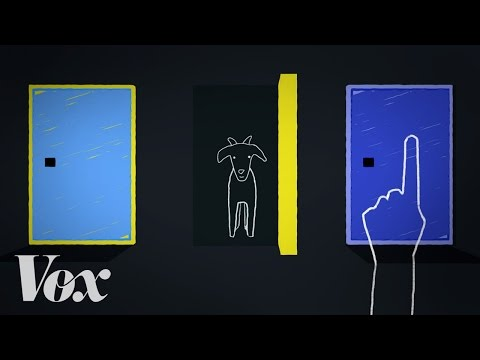

In [10]:
# Monty Hall Problem

YouTubeVideo('ggDQXlinbME', width=600, height=400)

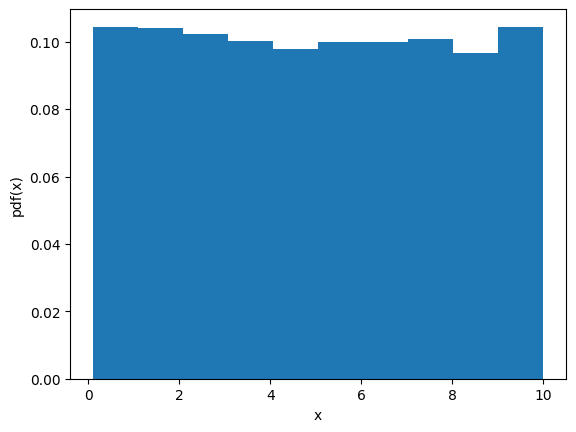

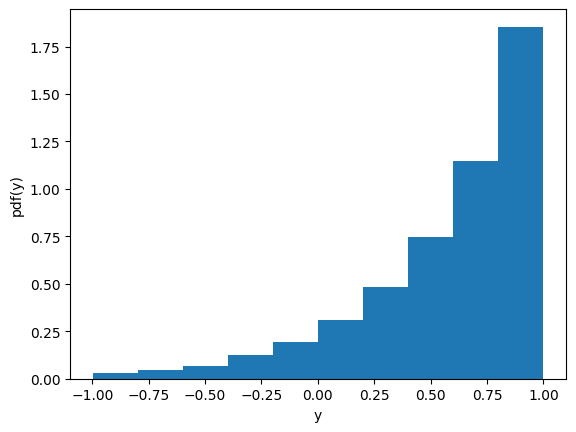

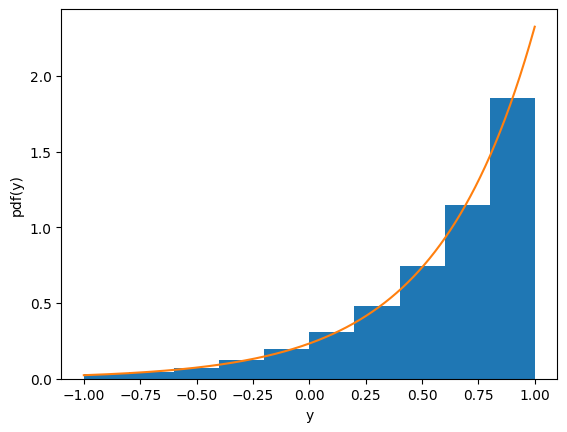

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
# Transformation rule for random variables (lecture 2):

N = 10000
x = np.random.uniform(low=0.1, high=10, size=N)
plt.hist(x, bins=10, density=True)
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

y = np.log10(x)
plt.hist(y, bins=10, density=True)
plt.xlabel('y')
plt.ylabel('pdf(y)')
plt.show()

# pdf(y) = |dx/dy|pdf(x)
# y = log10(x) --> |dy/dx|= 1/log(10)|1/x| --> |dx/dy|=log(10)*10^y
# pdf(y) = |log(10)*10^y|pdf(x)
def pdf(y):
  return np.log(10)*10**y/9.9
grid = np.linspace(-1, 1, 1000)

plt.hist(y, bins=10, density=True)
plt.plot(grid, pdf(grid))
plt.xlabel('y')
plt.ylabel('pdf(y)')
plt.show()

display(Math(r"\text{Mean robustness:}"))
display(Math(r"\log_{10}(\langle x \rangle) = " + str(np.log10(stats.mean(x)))))
display(Math(r"\langle y \rangle = " + str(stats.mean(y))))
display(Math(r"\text{Median robustness:}"))
display(Math(r"\log_{10}(x_{50}) = " + str(np.log10(stats.median(x)))))
display(Math(r"y_{50} = " + str(stats.median(y))))
display(Math(r"\text{You should note that the means are different, but the medians (as it is a cumulative statistic) are the same.}"))
display(Math(r"\text{The mean is affected by the scale of the sample values, but the median only depends on the ordering of the samples.}"))
display(Math(r"\text{Monotonic transformations (like taking the log) do not change the ordering of samples.}"))

##### L03

In [12]:
# A nasty integral (lecture 3):

xmax = 4
xmin = 0.3
result = []
rounds = 1000

def fun(x):
    return np.exp(x)*(4*x+3)**0.5*np.log(x**6)/np.tanh(x)

for i in range(rounds):
  xi = np.random.uniform(xmin, xmax, 100000)
  integral = (xmax-xmin)*np.mean(fun(xi))
  result.append(integral)

result = np.array(result, dtype=float)

In [13]:
print(np.mean(result))
print(np.std(result)/np.sqrt(rounds))

1391.8039262300103
0.19347944271325776


np.std() = $\sqrt{ \frac{ \sum_i{(a_i - \bar{a})^2} }{N} }$

np.mean() = $\frac{\sum_i{a_i}}{N}$

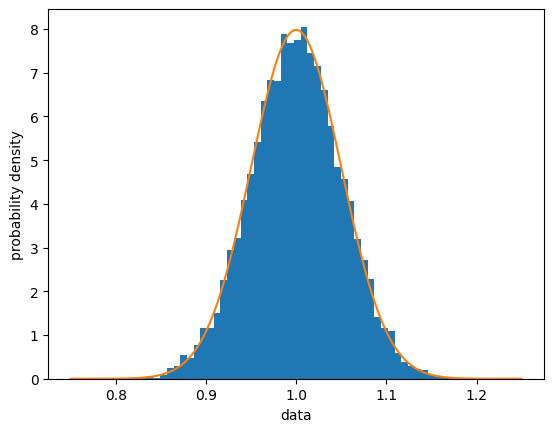

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
# Descriptive statistics (location, scale, shape):
# Cumulative statistics take longer to compute, but are more robust.

data = np.random.normal(loc=1, scale=0.05, size=10000)
grid = np.linspace(0.75, 1.25, 1000)
plt.hist(data, bins=50, density=True)
plt.plot(grid, norm.pdf(grid, loc=1, scale=0.05))
plt.xlabel('data')
plt.ylabel('probability density')
plt.show()

q25, q50, q75 = np.percentile(data, [25, 50, 75])
iqr = q75 - q25

display(Math(r"\text{Location statistics:}"))
display(Math(r"\mu = " + str(np.mean(data))))
display(Math(r"\text{median} = " + str(np.median(data))))
display(Math(r"\text{median} = q_{50} = " + str(q50)))

display(Math(r"\text{Two types of std deviation:}"))
display(Math(r"\sigma = " + str(np.std(data))))
display(Math(r"\sigma_G = " + str(astroMLstats.sigmaG(data))))
display(Math(r"\sigma_G = \text{IQR}\times 0.7413 = " + str(iqr*0.7413)))

display(Math(r"\text{Shape statistics:}"))
display(Math(r"\text{skewness} = " + str(scstats.skew(data))))
display(Math(r"\text{kurtosis} = " + str(scstats.kurtosis(data))))
display(Math(r"\text{mode approximation} = " + str(3*q50-2*np.mean(data))))

In [15]:
def sample_mu(data):
  return np.sum(data)/len(data)

def sample_sigma(data):
  return np.sqrt(np.sum((data-sample_mu(data))**2)/(len(data)-1))

def sample_mu_err(data):
  return sample_sigma(data)/np.sqrt(len(data))

def sample_sigma_err(data):
  return sample_mu_err(data)*np.sqrt(len(data)/(len(data)-1))/np.sqrt(2)

In [16]:
result_mu = []
result_sigma = []
rounds = 5000
size = 10000

for i in range(rounds):
  data_i = norm.rvs(loc=0, scale=10, size=size)
  result_mu.append(sample_mu(data_i))
  result_sigma.append(sample_sigma(data_i))

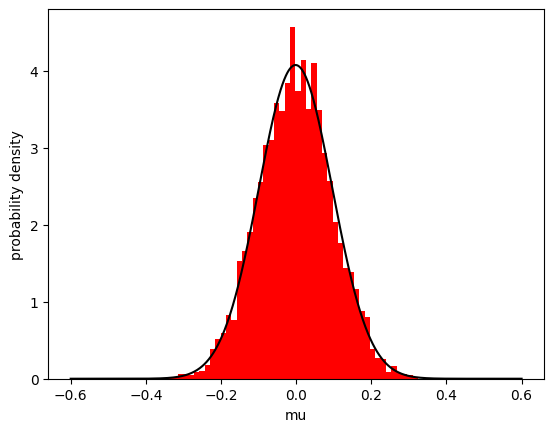

observed width =  0.09792751198575583
expected width =  0.10000657954031558


In [17]:
grid = np.linspace(-0.6, 0.6, 1000)
plt.hist(result_mu, bins=50, color="red", density=True)
plt.plot(grid, norm.pdf(grid, loc=np.mean(result_mu), scale=np.std(result_mu)), color="black")
plt.xlabel('mu')
plt.ylabel('probability density')
plt.show()

print("observed width = ", np.std(result_mu))
print("expected width = ", np.mean(result_sigma)/np.sqrt(size))

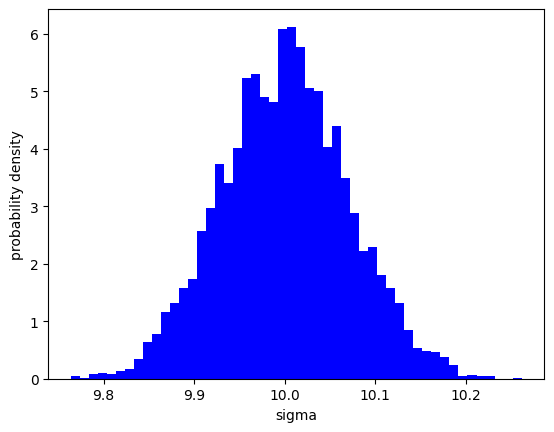

observed width =  0.0704086596896634
expected width =  0.0707188665879614


In [18]:
plt.hist(result_sigma, bins=50, color="blue", density=True)
plt.xlabel('sigma')
plt.ylabel('probability density')
plt.show()

print("observed width = ", np.std(result_sigma))
print("expected width = ", np.mean(result_sigma)/np.sqrt((size-1)*2))

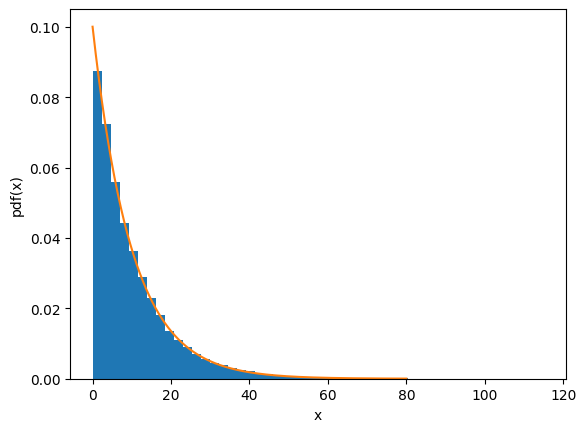

sample mean
 10.081
error on the sample mu
 0.101
sample standard deviation
 10.119
error on the sample sigma
 0.072


In [19]:
sample = expon.rvs(loc=0, scale=10, size=10000)
grid = np.linspace(0, 80, 1000)
plt.hist(sample, bins=50, density=True)
plt.plot(grid, expon.pdf(grid, loc=0, scale=10))
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

print("sample mean")
print(f"{sample_mu(sample): .3f}")
print("error on the sample mu")
print(f"{sample_mu_err(sample): .3f}")
print("sample standard deviation")
print(f"{sample_sigma(sample): .3f}")
print("error on the sample sigma")
print(f"{sample_sigma_err(sample): .3f}")

1-sigma confidence level =  0.68
2-sigma confidence level =  0.95
68% confidence region = [85.08, 114.92]
90% confidence region = [75.33, 124.67]


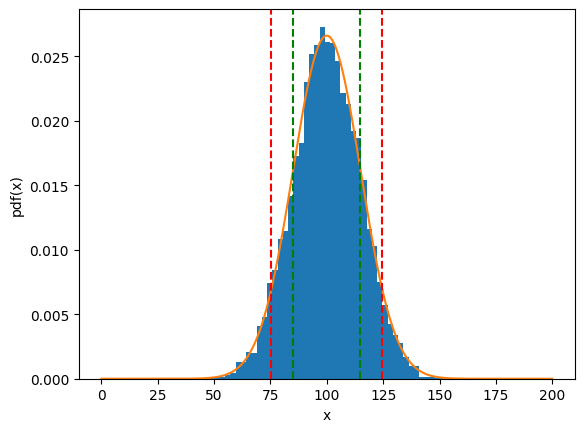

In [20]:
distG = norm(loc=100, scale=15) # Normal distribution with mean = 100, stdev = 15
draws = distG.rvs(10000) # 10000 random draws
xgrid = np.linspace(0, 200, 1000) # grid spaced uniformly
pdf = distG.pdf(xgrid) # pdf evaluated on the grid
cdf = distG.cdf(xgrid) # cdf evaluated on the grid

upper1 = distG.cdf(100+15)
lower1 = distG.cdf(100-15)
p_1sigma = upper1-lower1
print(f"1-sigma confidence level = {p_1sigma: .2f}")
upper2 = distG.cdf(100+30)
lower2 = distG.cdf(100-30)
p_2sigma = upper2-lower2
print(f"2-sigma confidence level = {p_2sigma: .2f}")

x_16=distG.ppf(0.16)
x_84=distG.ppf(0.84)
print(f"68% confidence region = [{x_16:.2f}, {x_84:.2f}]")
x_05=distG.ppf(0.05)
x_95=distG.ppf(0.95)
print(f"90% confidence region = [{x_05:.2f}, {x_95:.2f}]")
plt.hist(draws, bins=50, density=True)
plt.plot(xgrid, pdf)
plt.axvline(x=x_16, color='g', linestyle='--')
plt.axvline(x=x_84, color='g', linestyle='--')
plt.axvline(x=x_05, color='r', linestyle='--')
plt.axvline(x=x_95, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.show()

##### L04

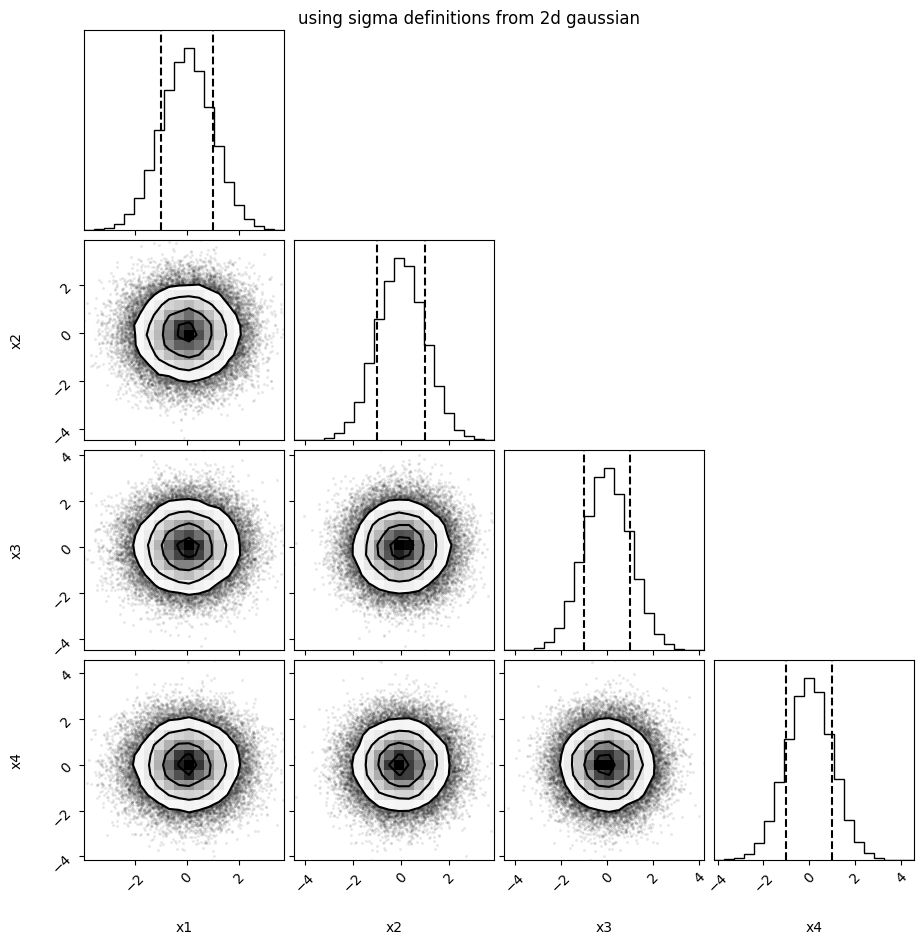

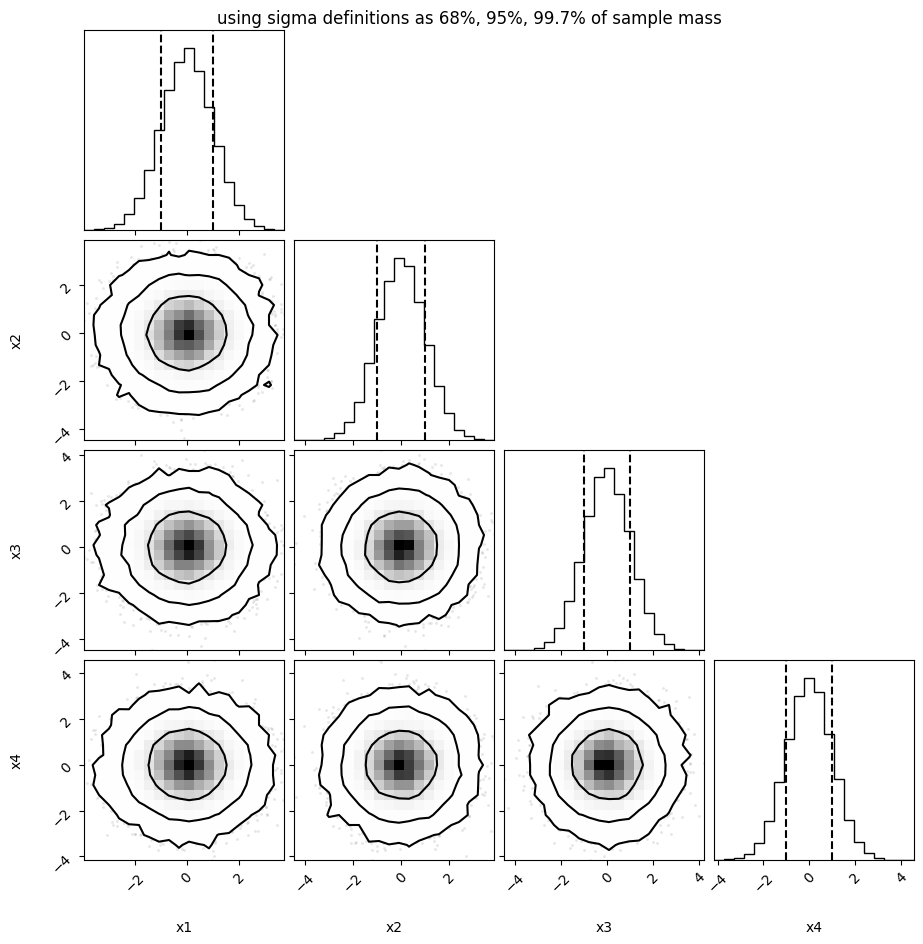

In [21]:
# Gaussian confidence levels in 2 dimensions (lecture 4):
# In corner, the relevant 1-sigma levels for a 2D histogram of samples is 39% not 68%.
# If you are using corner and want the usual 68% of the "sample mass" definition of sigma, use the levels keyword argument when you call corner.corner.

# Generate some fake data from a Gaussian
np.random.seed(42)
x = np.random.randn(50000, 4)

# formally correct sigma definition
fig = corner.corner(x, quantiles=(0.16, 0.84), labels=['x1','x2','x3','x4'])
fig.suptitle("using sigma definitions from 2d gaussian");

# standard sample mass definition
fig = corner.corner(x, quantiles=(0.16, 0.84), levels=(0.68, 0.95, 0.997), labels=['x1','x2','x3','x4'])
fig.suptitle("using sigma definitions as 68%, 95%, 99.7% of sample mass");

##### L05

In [22]:
# Frequentist approach and MLEs (lecture 5):

**Key differences**

Definition of probabilities:

1. In frequentist inference, probabilities describe the relative frequency of events over repeated experimental trials.
2. In Bayesian inferenece, probabilities instead quantify our subjective belief about experimental outcomes, model parameters, or even models themselves.

Quantifying uncertainty:

1. In frequentist inference we have confidence levels that describe the distribution of the measured parameter from the data around the true value.
2. In Bayesian inference we have credible regions derived from posterior probabilitiy distributions (we'll meet these later). These encode our "belief spread" in model parameters.

**Properties of MLEs:**

Assuming the data truly are drawn from the model, ML estimators have the following useful properties:

1. They are **consistent** estimators. They converge to the true parameter value as N tends to infinity.

2. They are **asymptotically normal** estimators. As N tends to infinity the distribution of the parameter estimate approaches a normal distribution, centered at the MLE, with a certain spread.

3. They **asymptotically achieve the theoretical minimum possible variance**, called the **Cramér-Rao bound**. They achieve the best possible uncertainty given the data at hand; no other estimator can do better in terms of efficiently using each data point to reduce the total error of the estimate.

##### L06

In [23]:
# Frequentist approach and MLEs in model fitting (lecture 6):

Let's assume that $\forall i,\, y_i=ax_i+b+r_i$ where the residuals have homoscedastic measurement uncertainties and are drawn from a gaussian distribution centered at zero: $\forall i,\, \sigma_i=\sigma$ and $r_i\in N(0, \sigma)$

The data model includes a linear relationship with two parameters $(a, b)$: hence the model is written as $M(a, b)$

Let's compute the likelihood. First, we ask ourselves what is the probability that a particular point would be measured. It is just the normal distribution:
$$p(y_i|x_i, M(a, b), \sigma) \equiv N(r_i|0, \sigma) = \frac{1}{ \sqrt{2\pi \sigma^2}}e^{-\frac{r_i^2}{2\sigma^2}}$$


In [24]:
def model(x, a, b):
  return a*x+b

In [25]:
def lnL(x, y, yerr, pars):
  return -0.5*np.sum(np.log(2*np.pi*yerr**2) + (y-model(x, pars[0], pars[1]))**2/yerr**2)

In [26]:
a, b = 0.3, 2
mu, sigma = 0, 0.5
grid = np.linspace(0, 10, 1000)

vec_x = np.linspace(0, 10, 20)
vec_r = np.random.normal(mu, sigma, 20)
vec_y = model(vec_x, a, b) + vec_r

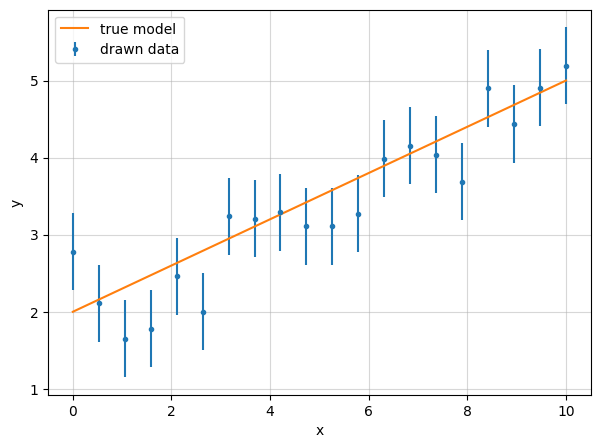

In [27]:
plt.figure(figsize=(7, 5))
plt.errorbar(vec_x, vec_y, yerr=sigma*np.ones(len(vec_y)), linestyle="", marker=".", label="drawn data")
plt.plot(grid, model(grid, a, b), label="true model")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left")
plt.grid(alpha=0.5)
plt.show()

In [28]:
LogL = lnL(vec_x, vec_y, sigma*np.ones(len(vec_y)), (a, b))
print(LogL)

-11.671790154631392


In [29]:
a_hint = np.linspace(0, 0.6, 100)
LogL_scan = []
for a_i in a_hint:
  LogL_scan.append(lnL(vec_x, vec_y, sigma*np.ones(len(vec_y)), (a_i, b)))

In [30]:
findmax = np.argmax(LogL_scan)
a_MLE = a_hint[findmax]

print("MLE = {:.3f}".format(a_MLE))
print("true = {:.3f}".format(a))

MLE = 0.285
true = 0.300


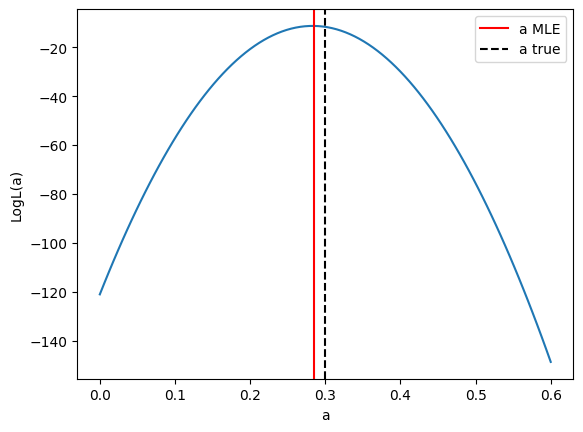

In [31]:
plt.plot(a_hint, LogL_scan)
plt.axvline(x=a_MLE, color='r', linestyle='-', label="a MLE")
plt.axvline(x=a, color='k', linestyle='--', label="a true")
plt.xlabel('a')
plt.ylabel('LogL(a)')
plt.legend()
plt.show()

In [32]:
from astroML.datasets import fetch_hogg2010test
# Get data from AstroML: this includes outliers
data = fetch_hogg2010test()
x = data['x'] # x data
y = data['y'] # y data
dy = data['sigma_y'] # uncertainties on y data
grid = np.linspace(0, 300, 1000)

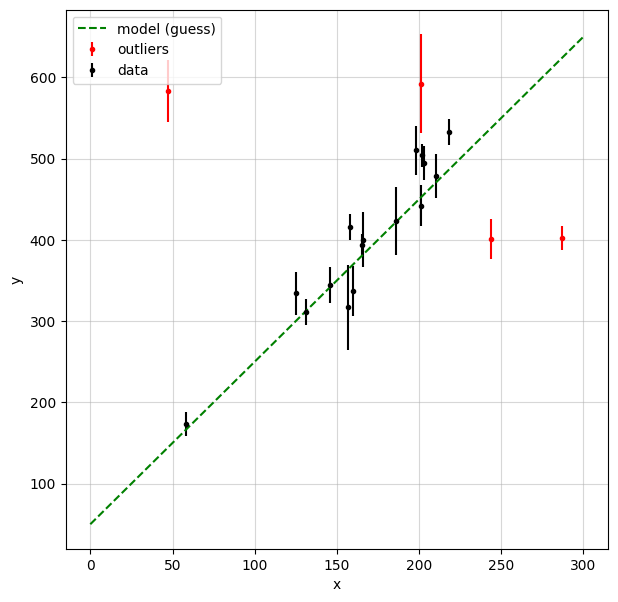

In [33]:
plt.figure(figsize=(7, 7))
plt.errorbar(x[:4], y[:4], yerr=dy[:4], linestyle="", marker=".", color="red", label="outliers")
plt.errorbar(x[4:], y[4:], yerr=dy[4:], linestyle="", marker=".", color="black", label="data")
plt.plot(grid, model(grid, 2, 50), "--g", label="model (guess)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [34]:
# Define the standard squared-loss function.
# This is just another name for chi^2
def squared_loss(a, b, x, y, dy):
    y_fit = a * x + b
    return np.sum(((y - y_fit) / dy) ** 2, -1)

In [35]:
# define a lambda function that defines the sum of squared errors.
# these lambda functions are useful!
# let's initially exclude the outliers by chopping off the first 4 points.
f_squared = lambda beta: squared_loss(beta[0], beta[1], x=x[4:], y=y[4:], dy=dy[4:])

# compute the maximum likelihood
beta_guess = (2, 50) # initial guess for a and b
beta_mle = optimize.fmin(f_squared, beta_guess)

Optimization terminated successfully.
         Current function value: 18.680770
         Iterations: 50
         Function evaluations: 94


In [36]:
print("a_MLE = {:.2f}".format(beta_mle[0]))
print("b_MLE = {:.2f}".format(beta_mle[1]))

a_MLE = 2.24
b_MLE = 34.05


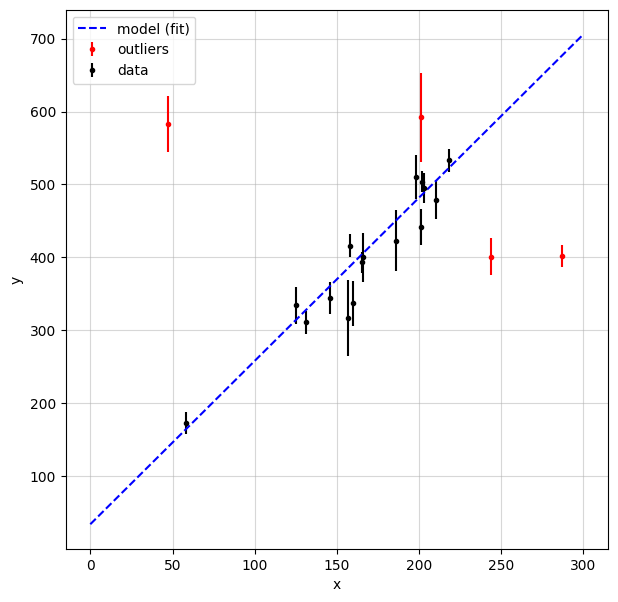

In [37]:
plt.figure(figsize=(7, 7))
plt.errorbar(x[:4], y[:4], yerr=dy[:4], linestyle="", marker=".", color="red", label="outliers")
plt.errorbar(x[4:], y[4:], yerr=dy[4:], linestyle="", marker=".", color="black", label="data")
plt.plot(grid, model(grid, beta_mle[0], beta_mle[1]), "--b", label="model (fit)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [38]:
# define a lambda function that defines the sum of squared errors.
# these lambda functions are useful!
# let's now include the outliers.
f_squared_out = lambda beta: squared_loss(beta[0], beta[1], x=x, y=y, dy=dy)

# compute the maximum likelihood
beta_guess = (2, 50) # initial guess for a and b
beta_mle_out = optimize.fmin(f_squared_out, beta_guess)

Optimization terminated successfully.
         Current function value: 289.963723
         Iterations: 57
         Function evaluations: 110


In [39]:
print("a_MLE = {:.2f}".format(beta_mle_out[0]))
print("b_MLE = {:.2f}".format(beta_mle_out[1]))

a_MLE = 1.08
b_MLE = 213.27


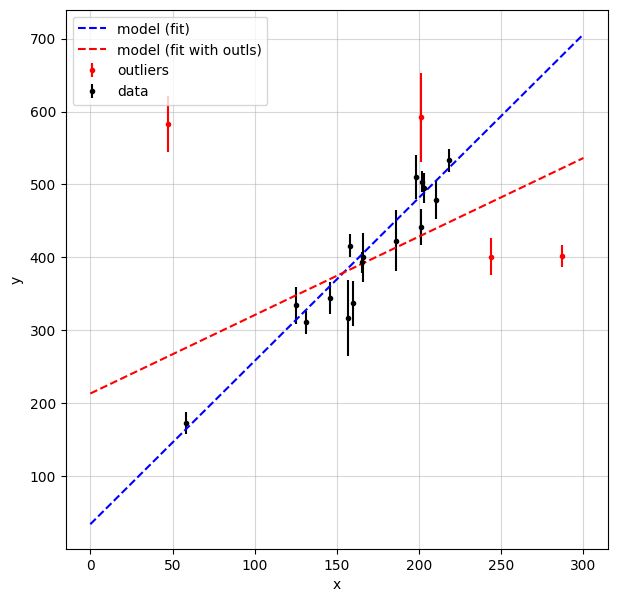

In [40]:
plt.figure(figsize=(7, 7))
plt.errorbar(x[:4], y[:4], yerr=dy[:4], linestyle="", marker=".", color="red", label="outliers")
plt.errorbar(x[4:], y[4:], yerr=dy[4:], linestyle="", marker=".", color="black", label="data")
plt.plot(grid, model(grid, beta_mle[0], beta_mle[1]), "--b", label="model (fit)")
plt.plot(grid, model(grid, beta_mle_out[0], beta_mle_out[1]), "--r", label="model (fit with outls)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.5)
plt.show()

The MLE approach tells us what the "best" model parameters are, but not how good the fit actually is. If the model is wrong, "best" might not be particularly revealing!

Using the best-fit parameters of a model, the maximum log likelihood value should not be an unlikely occurence. If it is, then our model is not describing the data well. Thus we need to know the distribution of $\ln L|_{MLE}$.

For Gaussian uncertainties, $\ln L$ is distributed as $\chi^2$.

In [41]:
# number of data points *without* outliers
N = x[4:].shape[0]

# number of data points *with* outliers
N_outlier = x.shape[0]

# number of model parameters (a,b)
k = 2

# chi2 per dof *without* outliers
chi2_inlier = squared_loss(beta_mle[0], beta_mle[1], x=x[4:], y=y[4:], dy=dy[4:])
chi2dof_inlier = chi2_inlier / (N-k)

# chi2 per dof *with* outliers
chi2_outlier = squared_loss(beta_mle_out[0], beta_mle_out[1], x=x, y=y, dy=dy)
chi2dof_outlier = chi2_outlier / (N_outlier - k)

# without outliers
dev_chi = chi2dof_inlier-1
sigma_chi = np.sqrt(2/(N-k))

print("Without outliers. chi2dof-1:", dev_chi, "dev_std:", sigma_chi, "N_sigma:", dev_chi/sigma_chi)

# with outliers
dev_chi_out =  chi2dof_outlier-1
sigma_chi_out = np.sqrt(2/(N_outlier-k))

print("With outliers. chi2dof-1:", dev_chi_out, "dev_std:", sigma_chi_out, "N_sigma:", dev_chi_out/sigma_chi_out)

Without outliers. chi2dof-1: 0.33434070794600657 dev_std: 0.3779644730092272 N_sigma: 0.8845823663904103
With outliers. chi2dof-1: 15.109095710111326 dev_std: 0.3333333333333333 N_sigma: 45.32728713033398


In [42]:
# distribuzione del chi quadrato ridotto
dist_chi2dof = chi2(df=N-k, loc=0, scale=1/(N-k))
moments = dist_chi2dof.stats(moments='mv')
print("mean =", moments[0], "and dev_std =", np.sqrt(moments[1]))

mean = 1.0 and dev_std = 0.3779644730092272


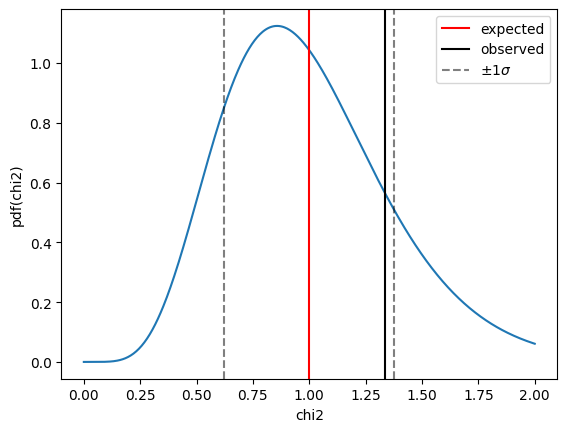

In [43]:
grid = np.linspace(0, 2, 500)
plt.plot(grid, dist_chi2dof.pdf(grid))
plt.axvline(x=1, color='r', linestyle='-', label="expected")
plt.axvline(x=chi2dof_inlier, color='k', linestyle='-', label="observed")
plt.axvline(x=1+np.sqrt(moments[1]), color='k', linestyle='--', alpha=0.5, label=r"$\pm 1\sigma$")
plt.axvline(x=1-np.sqrt(moments[1]), color='k', linestyle='--', alpha=0.5)
plt.xlabel('chi2')
plt.ylabel('pdf(chi2)')
plt.legend()
plt.show()

Most ways of computing confidence limits and uncertainties on measured model parameters assume that the distribution is Gaussian and our samples are large (e.g., I can use the Fisher matrix error only when I assume the asymptotically normality of the estimator).

More generally, computing uncertainties on a given estimator requires knowing its distribution. Often that's complicated (lot of maths) or impossibile (way too much maths).

**Boostrap** and **jackknife** are the two modern approaches to the problem, which have been made possible by the available computing power. They both rely on **resampling strategies**, and so in general **cross validation** is the way to go.

##### L07

In [44]:
# Frequentist approach and hypothesis testing (lecture 7):

Quantifying the null hypothesis rejection using the comparison between p-value, $p_i^{\mbox{value}} \equiv p^{\mbox{value}}(x_i|h_0) \equiv 1-H_0(x_i)$, and significance, $\alpha \equiv p_{\mbox{threshold}}^{\mbox{value}}$:
data would reject the null hypothesis if $p_i^{\mbox{value}} \leq \alpha$

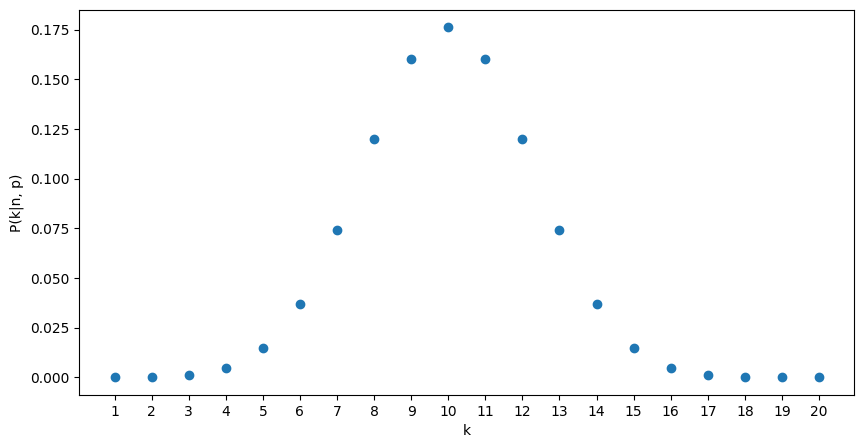

In [45]:
# Suppose you flip a fair coin (p=0.5) 20 times (n=20)
p = 0.5
n = 20

vec_k = np.arange(0, n)+1
draws = np.array([scstats.binom.pmf(k, n, p) for k in vec_k])

plt.figure(figsize=(10, 5))
plt.scatter(vec_k, draws)
plt.xticks(vec_k)
plt.xlabel('k')
plt.ylabel('P(k|n, p)')
plt.show()

In [46]:
# p-value of 14 heads in 20 flips
print("p-value = {:.3f}".format(np.sum(draws[vec_k>=14])))

p-value = 0.058


In [47]:
# In 20 flips, we get a result with p-value = 0.001.
# How many HEADS did we get?
print("heads = {:.0f}".format(scstats.binom.isf(1e-3, n, p)))

heads = 17


**Comparing Distributions**

Hypothesis testing is strongly linked to the comparison of distributions. Common questions are whether two samples are drawn from the same distribution, or whether a sample is drawn from some known distribution (like a Gaussian).

Suppose we wish to test the null hypothesis that two samples were drawn from the same distribution.
By far the most popular nonparametric statistic to do this is the one associated to the **Kolmogorov-Smirnov test** (KS test).

The KS test is based on a statistic that measures D, the maximum difference in the CDFs of the two samples.
The core idea is to know how often the value of D computed from our data would arise by chance if both samples were drawn from the same distribution (which is our null hypothesis here).
Amazingly, this does not depend on the underlying distributions.

We choose a confidence level of 95%; that is, we will reject the null hypothesis in favor of the alternative if the p-value is less than $\alpha = 0.05$.

#### Bayesian Statistics

##### L08

In [48]:
# Bayesian approach and posterior probability (lecture 8):

The basic premise of the Bayesian method is that probability statements can be made for model parameters and models themselves.

Inferences are made by producing probability density functions (PDFs); most notably, model parameters are treated as random variables.

These PDFs represent our "belief spread" in what the model parameters are. They have nothing to do with outcomes of repeated experiments (although the shape of resulting distributions can often coincide).

In short:
1. In frequentist analysis: the parameters are fixed and the data change (at least ideally with imaginary repeated measurements).
2. In Bayesian analysis: the data are fixed and the parameters change (as random variables).

**The Bayesian Statistical Inference process**:

1. formulate the likelihood,
2. chose a prior carefully,
3. determine the posterior pdf,
4. explore/map the posterior distribution
5. extract some summary statistics and quantify the uncertainty of the model parameter estimates selected,
6. perform model selection to find the most apt description of the data.

In [49]:
np.random.seed(123)
mu, sigma, N = 0.1, 0.2, 5 # mean, standard deviation and number of measurements
sample = np.random.normal(mu, sigma, N)
grid = np.linspace(-1, 1, 1000)

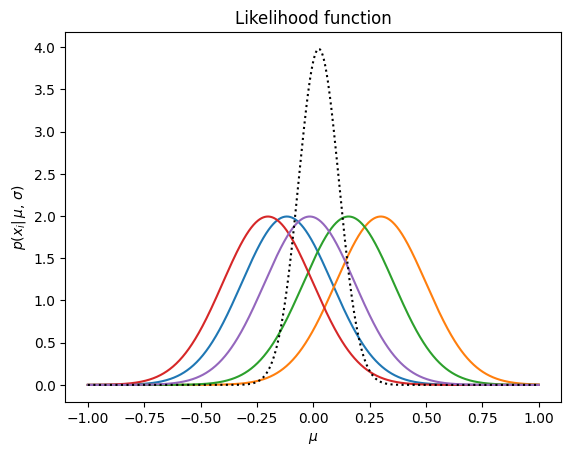

In [50]:
L = np.ones(len(grid))
for i in range(N):
    plt.plot(grid, norm.pdf(grid, sample[i], sigma))
    L = L*norm.pdf(grid, sample[i], sigma)
plt.plot(grid, L, c="black", ls='dotted')
plt.title("Likelihood function")
plt.xlabel(r'$\mu$')
plt.ylabel(r'$p(x_i|\, \mu,\, \sigma)$')
plt.show()

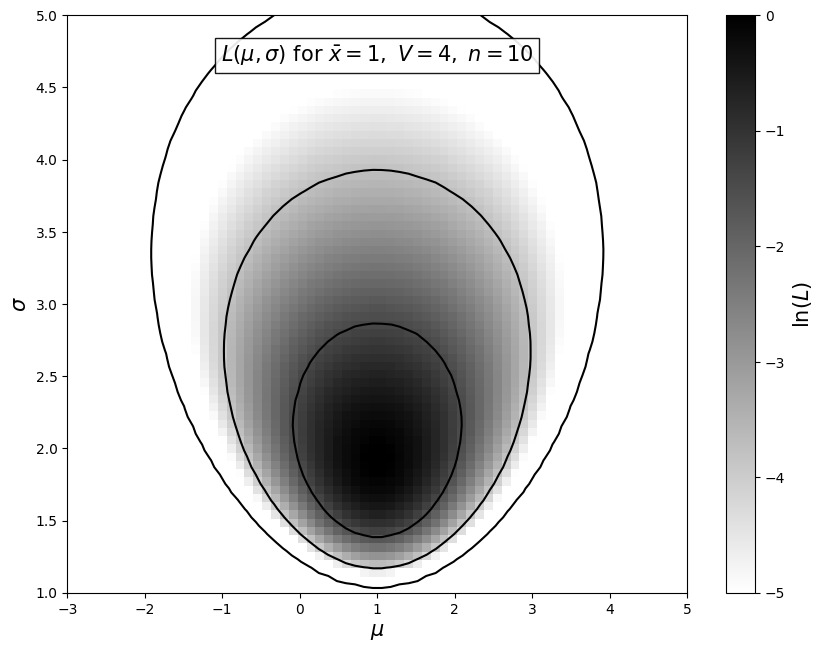

In [51]:
def gauss_logL(xbar, V, n, sigma, mu):
    return (-(n + 1) * np.log(sigma) - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

# Plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\ln(L)$', fontsize=15)
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center',
         fontsize=15, transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$', fontsize=15)
plt.ylabel(r'$\sigma$', fontsize=15)

plt.show()

##### L09

In [52]:
# Bayesian approach and model comparison (lecture 8):

In Bayesian inference, we probabilistically rank models based on how well they explain the data under our prior knowledge.

To determine which model is better we compute the ratio of the marginalized posterior probabilities (the **Odds ratio** for two models) as: $$O_{21} \equiv \frac{p(M_2|D)}{p(M_1|D)}$$

The posterior probability that the model is correct given data is: $$p(M|D)=\frac{p(D|M)p(M)}{p(D)}$$

So we can define the Odds ratio in terms of the **Bayes factor**: $$O_{21} \equiv \frac{p(D|M_2)p(M_2)}{p(D|M_1)p(M_1)} \equiv B_{21}\frac{p(M_2)}{p(M_1)}$$

**Consequences**

1. The Bayes factor compares how well the models fit the data.
2. It is a ratio of data likelihoods averaged over all allowed values of the model parameters: $$p(D|M)=\int_{\Omega_\theta}p(D|M,\theta)p(\theta|M)\mbox{d}\theta$$
3. If two models fit the data equally well, the "winner" is decided based on model priors.

**Notice**

We don't often care about the evidence for parameter estimation because it does not depend on model parameters.
BUT it's at the heart of Bayesian model selection, since it gives us a way of ranking different model descriptions of the data.

The evidence $p(D|M)$ (also called marginal likelihood for model M or "fully marginalized likelihood") is a weighted average of the likelihood function with the prior for model parameters acting as the weighting function.

**Important**

In classical hypothesis testing we can ask whether or not a single model provides a good description of the data.

In Bayesian hypothesis testing we can only and always compare two models: the odds ratio compares the models, it doesn't tell us anything about the absolute goodness of fit.

**How do we interpret the values of the odds ratio in practice?**

**Jeffreys** proposed a scale for interpreting the odds ratio, where $O_{21} > 10$ represents *“strong”* evidence in favor of $M_2$ ($M_2$  is ten times more probable than $M_1$), and $O_{21} > 100$ is *“decisive”* evidence ($M_2$ is one hundred  times more probable than $M_1$). When $O_{21} < 3$, the evidence is *“not worth more than a bare mention.”* When the odds ratio is very close to unity it is inconclusive.



##### L10

In [53]:
# Bayesian approach and MCMCs (lecture 10):

I need to find a posterior pdf, but getting the pdf is hard. Instead, getting samples is much easier. So I don't even try to calculate the posterior, I just sample it.

You could simply randomly sample the parameters space grid at every point, but that can be quite time consuming, and you will spend a lot of time in regions of parameters space that yields small likelihood.

A better way is to adopt a Monte Carlo-Markov Chain (MCMC). MCMC gives us a way to make this problem computationally tractable by sampling the full multi-dimensional parameters space, in a way that builds up the most sample density in regions that are closest to the maximum probability.

Then, you can post-process the “chain” of points to infer the posterior distribution and uncertainty regions. So the density of samples is going to be important.

> We want random sampling that preferentially steps into regions of high probability density.

A **Markov Chain** is defined as a sequence of random variables where the probability of picking a new point depends only on the preceding one. Such processes are "memoryless".

Additionally, the probability of a jump between two points does not depend on the direction of the jump (principle of detailed balance).

The use of Markov chains to perform Monte Carlo integration is called Markov Chain-Monte Carlo (MCMC) technique.

**Properties of a stationary Markov chain:**

Ideally, our traceplot in each parameter would be mixing well (moving across parameter space without getting stuck), and carving out the same patch of parameter space on average. The acceptance rate of new samples should be somewhere between 20%-50%, depending on the type of problem you're trying to solve.

Note that MCMC does not give you the value of the pdf on a grid: all you have are the samples!

Crucially, the density of samples is proportional to the posterior. So running a density estimation tool (histogram, KDE, etc) on those returns the pdf you're looking for.

##### L11

In [54]:
# Bayesian approach and practical MCMCs (lecture 11):

**Practical checks**

**1. CHECK ACCEPTANCE:**

some MCMC samplers give an updating estimate of the current acceptance rate of new samples. Ideally, for a sampler using some form of Metropolis-Hastings, this should be somewhere between 20%-50%, depending on the type of problem you're trying to solve.

- If the acceptance rate is high, the chain is moving but might not be exploring well. This gives high acceptance rate but poor global exploration of the posterior surface.

- If the acceptance rate is low, the chain is hardly moving meaning that it's stuck in a rut or trying to jump to new points that are too far away.

**2. CHECK TRACEPLOTS:**

After getting an idea of the acceptance rate, make traceplots of your chain. Ideally, our traceplot in each parameter would be mixing well (moving across parameter space without getting stuck), and carving out the same patch of parameter space on average. This will tell you whether your chain is getting stuck or encountering inefficiencies.

**3. CHECK AUTOCORRELATION LENGTH:**

The MCMC chain with Metropolis-Hastings will not give fully-independent random samples. The next point is influenced by where the previous point was. We need to check how much to down-sample the chain so that the points lack memory and influence from others. This is given by the autocorrelation length. **The operation of selecting samples every other autocorrleation lenght is called thinning**.

**PRACTICAL MCMC ALGORITHMS**

**1. Adaptive Metropolis (AM):**

In AM you use the empirically-estimated parameter covariance matrix to tune the width of the Gaussian proposal distribution.

**2. Single Component Adaptive Metropolis (SCAM):**

With high-dimensional model parameter spaces, or even target posterior distributions with significant covariances amongst some parameters, the AM method may suffer from low acceptance rates. One method that addresses this is a variant on AM called Single Component Adaptive Metropolis (SCAM). This involves jumping along selected eigenvectors (or principal axes) of the parameter covariance matrix, which is equivalent to jumping in only one uncorrelated parameter at a time.

**3. Hamiltonian Monte Carlo (HMC):**

These algorithms rely on treating the jumps as physical particles, subject to the Hamilton equations. Crucially, one needs to know the derivative of the likelihood, and not just the likelihood itself. Sometime this can be hard/expensive to compute.

**4. Differential Evolution (DE):**

Another popular proposal scheme is DE, which is a simple genetic algorithm that treats the past history of the chain up untill the current point as a population.

In DE, you choose two random points from the chain’s history to construct a difference vector along which the chain can jump.

**5. Affine-invariant ensemble sampling:**

At its core it’s a variant of MH (i.e., each walker proposes a new position and accepts/rejects it based on the Metropolis criterion), but the proposal mechanism is special (Goodman & Weare (2010) introduced the “stretch move” proposal).

EnsembleSampler is MH with a clever ensemble-based proposal.
It is not Hamiltonian, not standard adaptive MH, but conceptually related to differential-evolution MCMC because each walker’s proposal depends on others.
Its strength: efficient sampling for correlated parameters without tuning a covariance or mass matrix.

**The Full Proposal Cocktail:**

Real world MCMC should use a cocktail of proposal schemes, aimed at ensuring convergence to the target posterior distribution with minimal burn-in, optimal acceptance rate, and as short an autocorrelation length as possible.

In [55]:
# MCMC parameter estimation
# Let's generate some homoscedastic Gaussian data.
# We will assume the standard deviation is know, so we are only estimating mu.

N_data = 100
mu = 1.0
sigma = 0.5 # assumed known
data = norm(mu, sigma).rvs(N_data)

In [56]:
def Likelihood(x, sigma, data):
    # Gaussian likelihood
    return np.prod(np.exp(-(data-x)**2 /2 /sigma**2))

def Prior(x):
    return 1.0 / 10   # flat: it cancels out and has no effect

def Posterior(x, sigma, data):
    return Likelihood(x, sigma, data) * Prior(x)

# emcee wants ln of posterior pdf
def LogPosterior(x, sigma, data):
    return np.log(Posterior(x, sigma, data))

In [57]:
ndim = 1  # number of parameters in the model
nwalkers = 6  # number of MCMC walkers
burn = 10000  # "burn-in" period to let chains stabilize
nsteps = 100000  # number of MCMC steps to take **for each walker**

# initialize theta
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

# the function call where all the work happens:
sampler = emcee.EnsembleSampler(nwalkers, ndim, LogPosterior, args=[sigma, data])
sampler.run_mcmc(starting_guesses, nsteps)

# sampler.chain is of shape (nwalkers, nsteps, ndim)
# throw-out the burn-in points and reshape:
emcee_trace = sampler.chain[:, burn:, :].reshape(-1, ndim)

print("done")

done


In [58]:
print(sampler.chain.shape) # original chain structure
print(emcee_trace.shape) # burned and flattened chain

(6, 100000, 1)
(540000, 1)


In [59]:
# Now take one point every autocorrelation lenght
tau = sampler.get_autocorr_time()
print(tau)
thin = int(tau[0]+1)

[28.79207175]


In [60]:
emcee_trace = sampler.get_chain(discard=burn, thin=thin, flat=True)
print(emcee_trace.shape) # burned, flattened and thinned chain

(18618, 1)


In [61]:
mcmc_chain = emcee_trace.flatten()
print(mcmc_chain.shape)

(18618,)


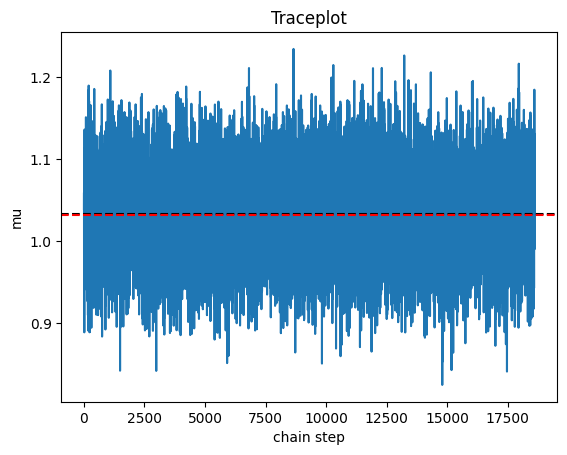

In [62]:
plt.plot(range(len(mcmc_chain)), mcmc_chain)
plt.axhline(y=np.mean(data), color='k', linestyle='--')
plt.axhline(y=np.mean(mcmc_chain), color='r', linestyle='--')
plt.xlabel('chain step')
plt.ylabel('mu')
plt.title('Traceplot')
plt.show()

In [63]:
mu_grid = np.linspace(0.8, 1.3, 1000)
exp_posterior = norm(np.mean(data), sigma/np.sqrt(len(data))).pdf(mu_grid)

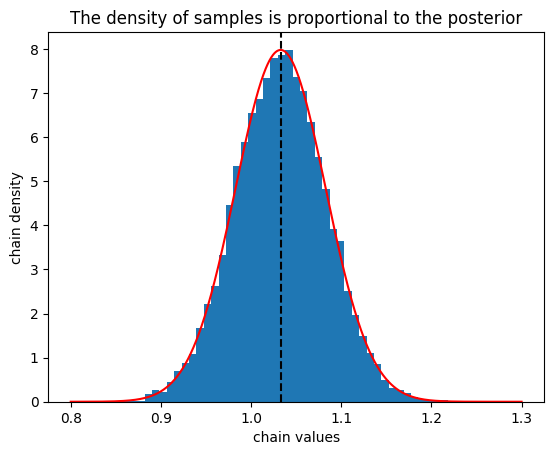

In [64]:
plt.hist(mcmc_chain, bins=50, density=True)
plt.plot(mu_grid, exp_posterior, color='r')
plt.axvline(x=np.mean(data), color='k', linestyle='--')
plt.xlabel('chain values')
plt.ylabel('chain density')
plt.title('The density of samples is proportional to the posterior')
plt.show()

**Gibbs Sampling**

Gibbs sampling is an MCMC method that avoids acceptance-rejection techniques. Instead, one sweeps through each parameter (or block of parameters) to draw from their conditional probability distributions, with all other parameters fixed to their current values.

After sampling for a sufficiently large number of Gibbs steps, the principles of MCMC guarantee that this process of sequential conditional probability drawing will converge to the joint posterior distribution of the overall model parameter space.

**Benefits** of Gibbs Sampling:
1. By drawing directly from the posterior conditionals, the auto-correlation length can be exceptionally small, with minimal burn-in.
2. It's also fast; sequential draws directly from the parameter posterior conditionals means that we are not rejecting any points.

**Drawbacks** of Gibbs Sampling:
1. You need to know the form of the conditional probability distributions for each parameter (or parameter blocks), and how to draw samples from it.
2. This can be a non-trivial problem, so typically a lot of effort is placed in manipulating the form of the posterior to find a conditional that is a standard probability distribution. This is where conjugate priors become really handy.

##### L12

In [65]:
# Bayesian approach and nested sampling for model selection (lecture 12):

Numerical techniques to do model comparison while sampling posteriors with MCMCs:

**1. Product-space sampling (or "hypermodels"):**

In this type of model comparison, you never explicitly try to compute the Bayesian evidence.

You can think of it as: the MCMC sampler is walking in a giant product-space containing all models; only one model at a time is "lit up" (active); the chain spends proportionally more time in models that explain the data in a better way.

So you are literally exploiting the fact that " MCMC time allocation for some region of parameter space = posterior probability mass of that region" (i.e., after sampling sufficiently long, the MCMC chain will spend different amounts of time in differnt regions of the model indexing parameter, in proportion to the Bayesian odds ratio).

The empirical frequency of visits to $M_i$, one of the models, is a direct Monte Carlo estimate of its posterior probability $p(M_i|D)$

**2. Thermodynamic Integration:**

It is used for exact calculation of the Bayesian evidence.

Many MCMC chains are launched in parallel. However, their likelihoods differ slightly in their "temperature" T. We actually use the inverse temperature 1/T when writing the math.

Thus, only the T=0 chain corresponds to the actual model likelhiood.
But the other temperature chains have the effect of taking higher and higher roots of the likelihood, smoothing it out and making it more similar to the original prior.

These high temperature chains explore the parameter volume well, communicate back to the T=0 chain, and improve MCMC mixing.

Crucially, we can also use them in evidence computation, where we take the mean log-likelihood of each chain, then sum these over all temperatures to get the log-evidence.


#### Machine Learning

##### L13

In [66]:
# Introduction (lecture 13):

**The categories of maching learning are:**

**Supervised learning**, where our training set has "labels". The Scikit-Learn tools for supervised learning can further be broken into two subcategories:

1. **classification:** where the data can be separated into two or more "classes" and we can use the labels from the training data to predict the labels for the test data;
2. **regression:** where instead of having training data with discrete labels, the "truth" is a continuous property and we are trying to predict the values of that property for the test data.

**Unsupervised learning**, where our training set does not have labels, yet we would like to empirically determine something about the data. The Scikit-Learn tools for unsupervised learning include those that:

1. can help determine if the data can be represented as belonging to distinct groups (**clustering**);
2. can determine the distribution of the data within the parameter space (**density estimation**);
3. can better visualize the data (and hope to learn something in so doing) by projecting a high-dimensional space down to 2-3 dimensions (**dimensionality reduction**).

This difference is blurry though. Indeed, there's a whole field of data science around "semi-supervised learning" or "weak supervision", for cases where you have a some knowledge of the dataset (often partial and/or indirect).

**Aim of machine learning:**

we learn a model using training data and then we use that model to make predictions about test data

**Scikit-Learn:**

Most ML algorithms implemented in Scikit-Learn expect data to be stored in a `[n_samples, n_features]` array.

Features are distinct traits that can be used to describe each sample in a quantitative manner. Features are generally real-valued, but may be boolean or discrete-valued in some cases. Often we call them "dimensions" of our samples.

In [67]:
# One famous classification example:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Supervised learning, regression on a descrete set of labels, it can be associated with model selection in statistical inference.

Generative (I want correct probability distributions) vs discriminative (I only want the one class with the highest probability to be the correct one) classification.

In [68]:
n_samples, n_features = iris.data.shape
n_labels = len(iris.target_names)
print("Number of samples:", n_samples)
print("Number of features:", n_features)
print("Number of classes:", n_labels)

Number of samples: 150
Number of features: 4
Number of classes: 3


In [69]:
iris_table = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_table["label"] = iris.target
map = dict(zip(range(n_labels), iris.target_names))
iris_table["label name"] = iris_table["label"].map(map)

In [70]:
iris_table.sample(frac=0.1, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label name
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor
31,5.4,3.4,1.5,0.4,0,setosa
64,5.6,2.9,3.6,1.3,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
68,6.2,2.2,4.5,1.5,1,versicolor
82,5.8,2.7,3.9,1.2,1,versicolor


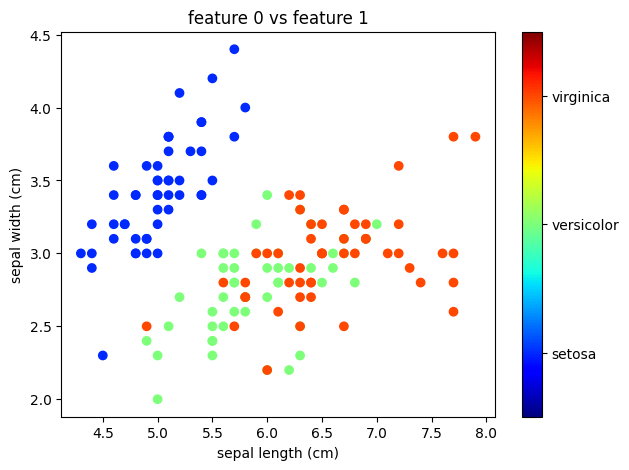

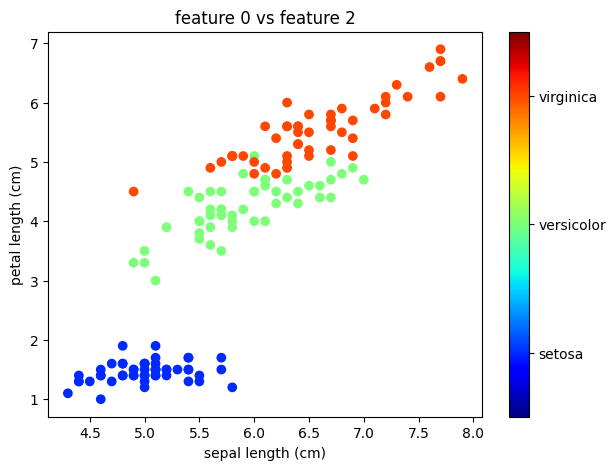

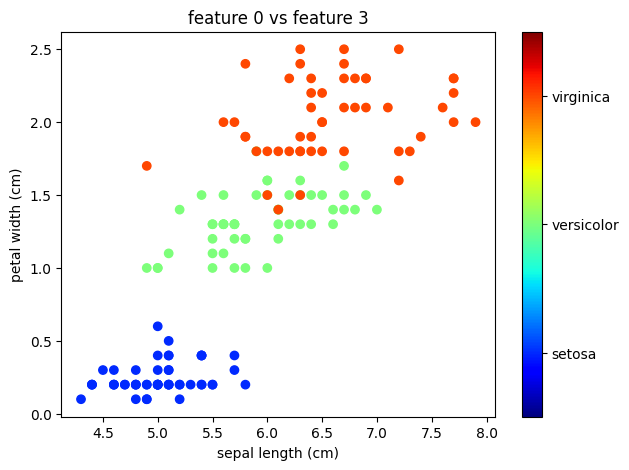

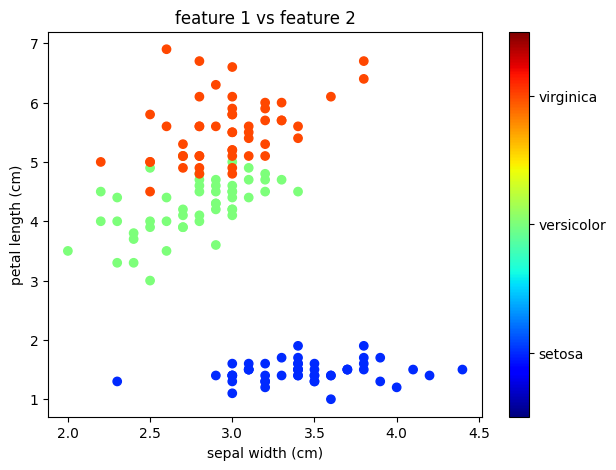

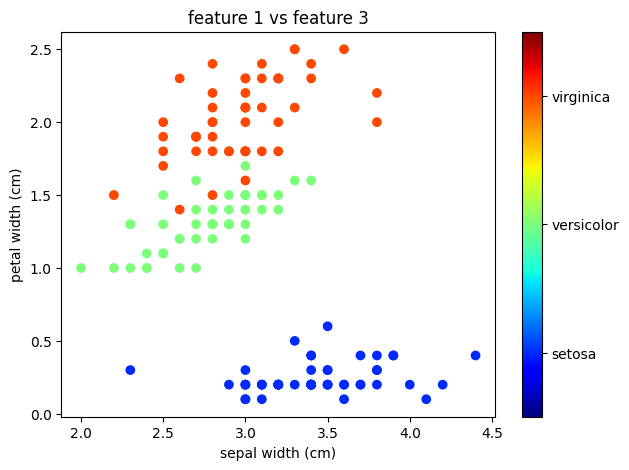

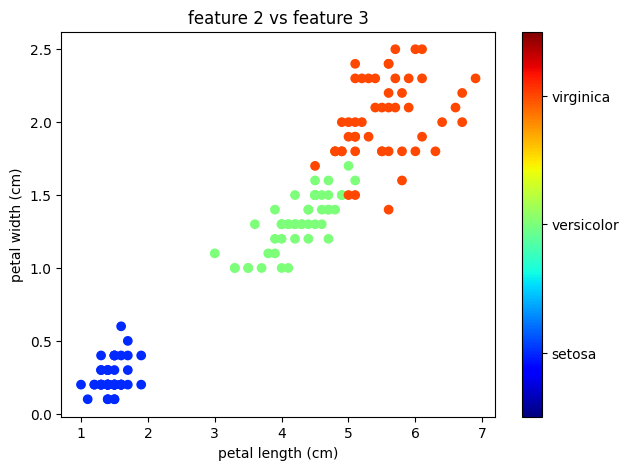

In [71]:
# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
for i in range(n_features):
  for j in range(n_features):
    if j > i:
      plt.figure(figsize=(7, 5))
      x_index = i
      y_index = j
      plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target, cmap=plt.colormaps['jet'])
      plt.colorbar(ticks=[0, 1, 2], format=formatter)
      plt.clim(-0.5, 2.5)
      plt.xlabel(iris.feature_names[x_index])
      plt.ylabel(iris.feature_names[y_index])
      plt.title("feature {} vs feature {}".format(x_index, y_index))
      plt.show()

For our classification example, **K Nearest Neighbors** (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

In [72]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [73]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5) # Complete with number of neighbors

# fit the model
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [74]:
result = knn.predict(X_test)

In [75]:
knn.predict_proba(X_test)

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. 

In [76]:
print(accuracy_score(y_test, result))

0.9466666666666667


In [77]:
print(confusion_matrix(y_test, result))

[[29  0  0]
 [ 0 23  0]
 [ 0  4 19]]


**Train Test Split** paints a better picture of the true performance of our classifier: apparently there is some confusion between the second and third species, which we might anticipate given what we've seen of the data above.

This is why it's extremely important to use a train/test split when evaluating your models.

Let's do the same, but now using sklearn.svm.SVC (this is **Support Vector Machine Classification**)

In [78]:
from sklearn.svm import SVC

In [79]:
model = SVC()
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [80]:
result = model.predict(X_test)

In [81]:
knn.predict_proba(X_test)

array([[0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 1. 

In [82]:
print(accuracy_score(y_test, result))

1.0


In [83]:
print(confusion_matrix(y_test, result))

[[29  0  0]
 [ 0 23  0]
 [ 0  0 23]]


Now, for example, in the iris data discussed above, we can use unsupervised methods to determine combinations of the measurements which best display the structure of the data. Such a projection of the data can be used to visualize the four-dimensional dataset in two dimensions.

**Principle Component Analysis** (PCA) is a dimension reduction technique that can find the combinations of variables that explain the most variance.

Consider the iris dataset. It cannot be visualized in a single 2D plot, as it has 4 features. We are going to extract 2 combinations of sepal and petal dimensions to visualize it.

In [84]:
from sklearn.decomposition import PCA

In [85]:
pca = PCA(n_components=2)
pca.fit(X)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [86]:
X_reduced = pca.transform(X)

Reduced dataset shape: (150, 2)
Projection of the 2 components:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


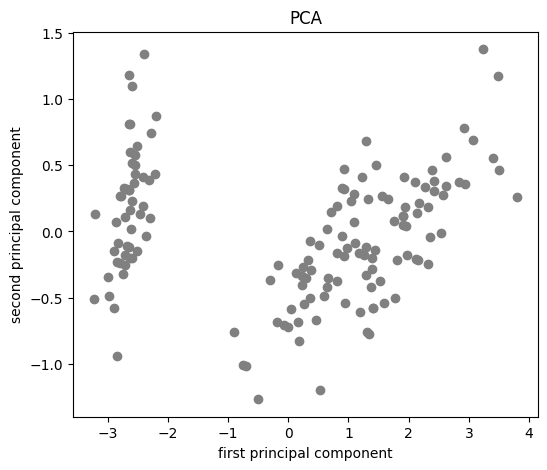

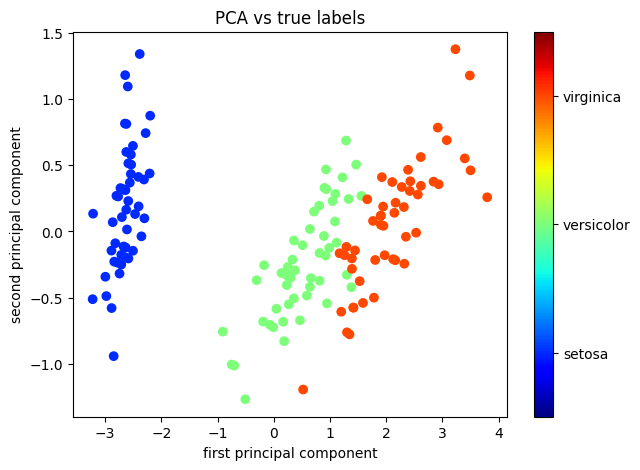

In [87]:
print("Reduced dataset shape:", X_reduced.shape)

print("Projection of the 2 components:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, iris.feature_names)))

plt.figure(figsize=(6, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c='gray')
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("PCA")
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.colormaps['jet'])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("PCA vs true labels")
plt.show()

This projection maximizes the separation of the classes without using the labels!
We can use this either just for visualization or to actually help define the classes.
From the separation of points in the PCA projection, we can easily see there are either two or three distinct classes.

Note how this is completely unsupervised. We've only used X and not y. The algorithm doesn't know anything about 'setosa' 'versicolor' and 'virginica', but it still figures out that there are different datasets in there.

**Clustering: K-means**

Clustering groups together observations that are homogeneous with respect to a given criterion, finding ''clusters'' in the data.

Note that these clusters will uncover relevant hidden structure of the data only if the criterion used highlights it.

Let's look at KMeans

In [88]:
from sklearn.cluster import KMeans

In [89]:
k_means = KMeans(n_clusters=3, n_init='auto')
k_means.fit(X_reduced)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [90]:
y_pred = k_means.predict(X_reduced)

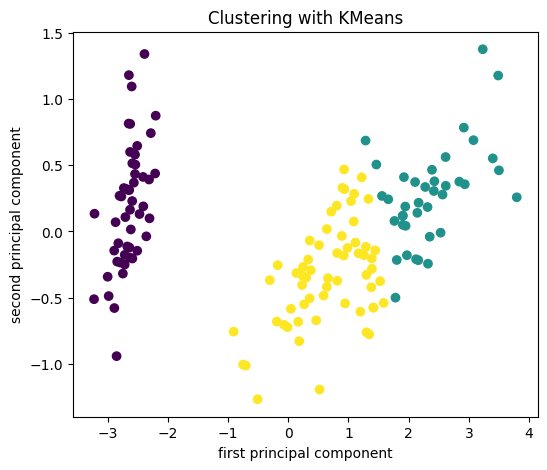

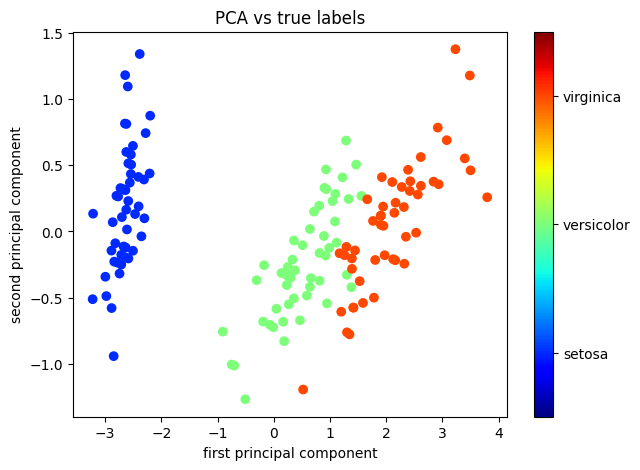

In [91]:
plt.figure(figsize=(6, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap=plt.colormaps['viridis'])
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("Clustering with KMeans")
plt.show()

plt.figure(figsize=(7, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.colormaps['jet'])
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel("first principal component")
plt.ylabel("second principal component")
plt.title("PCA vs true labels")
plt.show()

So Kmeans did roughly what we might have expected by eye from the application of PCA. The dark objects are all classified correctly, but there are some errors on the yellow-green border.

##### L14